In [1]:
# import necessary libraries
from pathlib import Path
import requests
import pandas as pd
from io import BytesIO
import gzip
import shutil

def download_one_file(year: int, month: int, day: int) -> pd.DataFrame:
    """
    Downloads calendar data for a given year and month from Inside Airbnb and saves it as a Parquet file.

    Args:
    - year (int): The year of the data to download.
    - month (int): The month of the data to download.
    - day (int): The day of the data to download.

    Returns:
    - df (pd.DataFrame): The DataFrame containing the downloaded data.
    """
    URL = f'http://data.insideairbnb.com/united-states/ny/new-york-city/{year}-{month:02d}-{day:02d}/data/calendar.csv.gz'
    response = requests.get(URL)

    if response.status_code == 200:
        path = f'../data/raw/new-york-city/calendar-{year}-{month:02d}-{day:02d}.parquet'

        with open(path, 'wb') as file:
            file.write(response.content)

        # Decompress the gzipped file and read it with Pandas
        with gzip.open(path, 'rb') as f:
            df = pd.read_csv(f, encoding='utf-8', delimiter=',')
        
        # Save the DataFrame as a Parquet file
        df.to_parquet(path.replace('.parquet', '.csv.parquet'), engine='pyarrow', compression='snappy')

        return df
    else:
        raise Exception(f'{URL} is not available.')


In [5]:
# explore and validate one single file
download_one_file(year=2023, month=10, day=1)

# Specify the path where you want to save the decompressed CSV
file_path = '../data/raw/new-york-city/calendar-2023-10-01.csv.parquet'


# Read the decompressed CSV with Pandas
df = pd.read_parquet(file_path)

df.head(20)

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,2595,2023-10-02,f,$240.00,$240.00,30.0,1125.0
1,2595,2023-10-03,f,$240.00,$240.00,30.0,1125.0
2,2595,2023-10-04,f,$240.00,$240.00,30.0,1125.0
3,2595,2023-10-05,f,$240.00,$240.00,30.0,1125.0
4,2595,2023-10-06,f,$240.00,$240.00,30.0,1125.0
5,2595,2023-10-07,f,$240.00,$240.00,30.0,1125.0
6,2595,2023-10-08,f,$240.00,$240.00,30.0,1125.0
7,2595,2023-10-09,f,$240.00,$240.00,30.0,1125.0
8,2595,2023-10-10,f,$240.00,$240.00,30.0,1125.0
9,2595,2023-10-11,f,$240.00,$240.00,30.0,1125.0


<ipython-input-7-557a9a3de1b3>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['available'] = filtered_df['available'].map({'t': True, 'f': False})


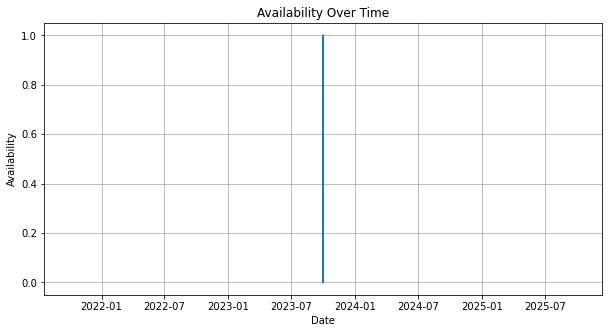

In [7]:
import matplotlib.pyplot as plt


# First, ensure the 'date' column is in the correct date format (if not, convert it)
df['date'] = pd.to_datetime(df['date'])

# Filter the DataFrame for the desired period
start_date = '2023-01-01'
end_date = '2023-10-01'  # Replace with your desired date range
filtered_df = df[(df['date'] >= start_date) & (df['date'] <= end_date)]

# Convert 'available' column values to boolean
filtered_df['available'] = filtered_df['available'].map({'t': True, 'f': False})

# Create a plot
plt.figure(figsize=(10, 5))
plt.plot(filtered_df['date'], filtered_df['available'])
plt.title('Availability Over Time')
plt.xlabel('Date')
plt.ylabel('Availability')
plt.grid(True)
plt.show()